# Introducció a la construcció de gràfics i mapes
Primers exercicis de construcció de mapes i gràfics. A continuació es mostra el codi creat i utilitzat per dur a terme la següent pràctica.

### Gràfics

En primer lloc s'afegeixen les biblioteques necessàries per realitzar l'exercici. Les biblioteques ja han estat instal·lades prèviament a l'ordinador. Les biblioteques inclouen funcions que ajudaran a agilitzar la feina. S'utilitzaran les biblioteques numpy, matplot, Dataset i basemap:

In [3]:
# import modules
import numpy as np
import matplotlib as mpl
from netCDF4 import Dataset as ncread
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
mpl.axes.Axes.pie
mpl.pyplot.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)>

A continuació afegim al codi l'arxiu de des en el que es treballarà (e20C_Amon_tas_190001-201012.nc), l'arxiu conté les temperatures del planeta a una altura de dos metres. Les dades comprenen tots els anys entre el gener de 1900 i el desembre de 2010. Prèviament i tal com es mostra en la il·lustració 2.1, hem visualitzat les dades més importants del document des d'un compilador Python. Tal com es pot observar, l'arxiu conté diferents variables: la variable de la longitud (g4_lon_2), la de la latitud (g4_lat_1) i la de la temperatura (2T_GDS4_SFC). En aquest exercici es definiran com a variables "lon", "lat" i "t". La variable "t" és diferent a les altres dues, és una matriu.
Les primeres línies de la il·lustració 2.1 indiquen el nombre de longituds i latituds que emmagatzema el fitxer, en aquest cas 320 i 160. Aquests numeros estaran definits en el programa en les variables "ni" i "ny". A continuació es defineix la variable "nyr", aquesta variable correspon al nombre d'anys que comprèn el fitxer. Com que les dades inicials estan en mesos, per aconseguir aquesta variable s'haurà de dividir entre 12 el nombre de mesos que conté el fitxer (1332 mesos/12 = 111 anys)ç
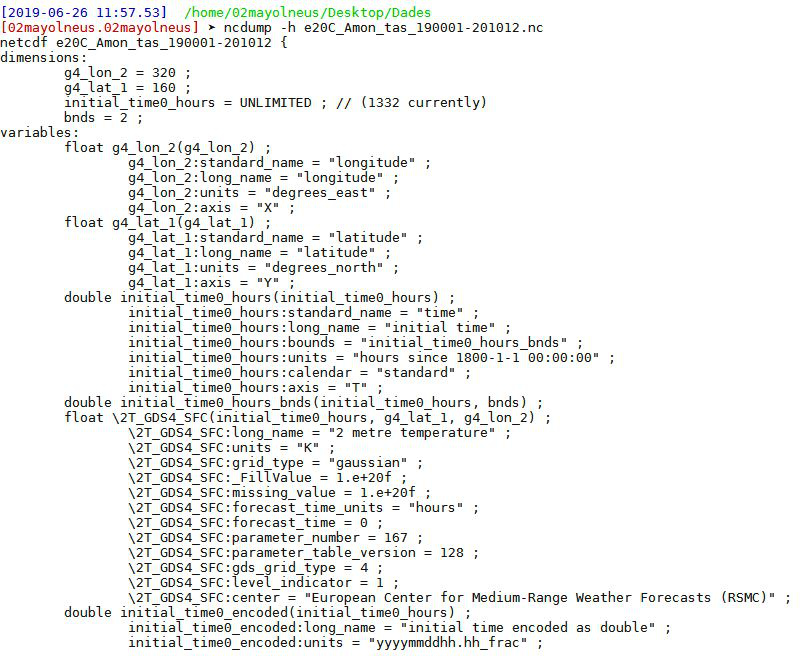
Il.lustració 2.1: Variables mostrades pel compilador,

In [4]:
data_path = "C:/Users/alumne/Desktop/Dades/"
nc = ncread(data_path+'e20C_Amon_tas_190001-201012.nc')
#Definim les variables
t = nc.variables['2T_GDS4_SFC'][:]
lon = nc.variables['g4_lon_2'][:]
lat = nc.variables['g4_lat_1'][:]
ni=len(lon)
ny=len(lat)
nyr=int(len(t[:,0,0])/12)
#nt=len(t[:,0,0])

Tal com s'ha mencionat anteriorment, la variable t és una matriu. En la següent part de codi es reestructurarà la matriu per fer-la més còmoda a l'hora de treballar-hi. A partir d'ara la matriu "t" mostrarà les en el ordre [nombre d'any,12,latitud,longitud] o, utilitzant les variables definides anteriorment [nyr,12,ny,ni]. El nombre d'any serà un nombre entre 0 i 111. El zero correspondrà a l'any 1900 i així conseqüentment. En el segon lloc de la matriu trobem el número dotze perquè correspon al nombre de mesos de l'any. En aquesta dimensió, el número zero correspondrà al mes de gener i l'onze al desembre. 

In [5]:
t = np.reshape(t,(nyr,12,ny,ni))

Com que les dades ja estan ben estructurades, es procedeix a treballar amb elles. Per començar es crearà un gràfic que mostri la variació de la temperatura durant un any. Com exemple s'agafarà l'any 2002.
Per començar s'indica en la matriu que volem les dades del 2002 (any 102). Com que es volen saber les dades en totes les latituds i longituds i durant tots els mesos de l'any, es posarà el signe ":" en la resta de paràmetres de la matriu, d'aquesta manera s'indica que no volem especificar cap longitud ni latitud.

Per saber la temperatura global en un mes de l'any, es farà la mitjana de la temperatura en totes les latituds i després es calcularà la mitjana de tots els resultats anteriors. Al final de tot, es resta 273.15 al resultat perquè la temperatura passi de graus Kelvin a graus centígrads. El procés es repeteix dotze vegades ja que hem d'obtenir dades de cada mes de l'any 2002.

In [4]:

t_j=t[102,:,:,:]-273.15#S'escull l'any 2002.
#t_g=np.mean(t_j,axis=0)#Mitjana en totes les latituds.
t_g=np.mean(t_j,axis=2)#Mitjana de tots els resultats anteriors i a graus centígrads.
coslat=np.cos(np.radians(lat))
suma=np.sum(coslat)
t_g_a=np.empty(12)
t_g_a.fill(np.nan)
for it in range(12):
    t_g_a[it]=np.sum(coslat[:]*t_g[it,:])/suma

El resultat anterior es reproduirà en forma de gràfic.

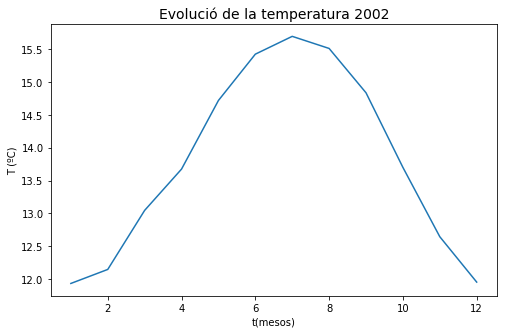

In [5]:
months=np.arange(12)+1
fig,ax1=plt.subplots(figsize=(8,5))
plt.plot(months,t_g_a)
plt.title('Evolució de la temperatura 2002',fontsize=14)
plt.xlabel('t(mesos)')
plt.ylabel('T (ºC)')
fig.savefig(data_path+'fig_i', bbox_inches='tight',dpi=400)

Il·lustració 2.2_ Evolució de la temperatura mitjana durant el 2002.

Ara es crearà un gràfic on es compararà l'evolució de temperatura de l'any amb la del 1900, el primer any en que tenim dades. Es seguirà el mateix procés però canviant l'any 2002 (any 102) per l'any 1900 (any 0).

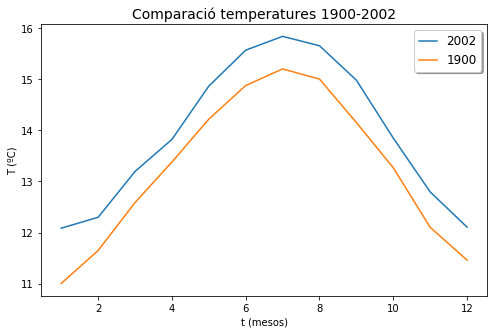

In [7]:
t_h=t[0,:,:,:]-273.15
t_i=np.mean(t_h,axis=2)
t_i_a=np.empty(12)
t_i_a.fill(np.nan)
for it in range(12):
    t_i_a[it]=np.sum(coslat[:]*t_i[it,:])/suma

fig,ax1=plt.subplots(figsize=(8,5))
plt.plot(months,t_g_a)
plt.plot(months,t_i_a)
plt.title('Comparació temperatures 1900-2002',fontsize=14)
plt.xlabel('t (mesos)')
plt.ylabel('T (ºC)')

plt.legend(('2002', '1900'),
           shadow=True, handlelength=1.5, fontsize=12)
fig.savefig(data_path+'fig_ii', bbox_inches='tight',dpi=400)

Il·lustració 2.3: Comparació de l'evolució de la temperatura entre el 1900 i el 2002.

El gràfic ensenya una diferència de temperatura, com si en general la mitjana de l'any 2002 hagués pujat. Per veure quina és la diferència entre les mitjanes es demanarà al programa que ens ensenyi la diferència. Farem la temperatura mitjana dels dos anys i la restarem. El resultat mostra 0,7 graus de diferència. La raó d'aquesta diferència podria ser la presència d'alguna anomalia en el clima.

In [8]:
t_i_a_a=np.nanmean(t_i_a, axis=0)
t_g_a_a=np.nanmean(t_g_a, axis=0)
t_gi_a_a=t_g_a_a-t_i_a_a
print('Difèrencia de temperatures mitjanes:',t_gi_a_a,'ºC')

Difèrencia de temperatures mitjanes: 0.6811814308166504 ºC


L'objectiu del següent exercici és fer el mateix que el primer exercici però diferenciant els dos hemisferis. Com que ara s'hauran de tenir en compte les latituds, el procediment serà una mica diferent. Es treballarà amb les temperatures de l'any 1986. 
En primer lloc es definirà la latitud en que es vol treballar (en aquest cas, 45º i -45º). Per això es demanarà a l'ordinador que mostri totes les latituds de l'arxiu de dades.

In [9]:
print(lat)

[ 89.14152     88.02943     86.910774    85.79063     84.66992
  83.54895     82.42782     81.306595    80.18531     79.06398
  77.94263     76.82124     75.699844    74.57843     73.45701
  72.33558     71.214134    70.09269     68.97124     67.849785
  66.728325    65.606865    64.4854      63.363934    62.242462
  61.12099     59.99952     58.878044    57.75657     56.635094
  55.513615    54.392136    53.270657    52.149174    51.027695
  49.90621     48.78473     47.663246    46.541763    45.42028
  44.298794    43.17731     42.055824    40.934338    39.81285
  38.691364    37.56988     36.44839     35.326904    34.205418
  33.08393     31.962444    30.840956    29.719467    28.597979
  27.47649     26.355003    25.233515    24.112024    22.990536
  21.869047    20.747559    19.62607     18.50458     17.383091
  16.2616      15.140112    14.018622    12.897133    11.775643
  10.654153     9.532663     8.411174     7.2896843    6.1681943
   5.0467043    3.9252145    2.8037248    1.

Es faran servir les latituds de 45º i -45º representant els hemisferis nord i sud respectivament. Com que cap de les latituds anteriors correspon als 45º justos, s'agafarà la latitud més pròxima a la xifra (fent servir una eina de la biblioteca "numpy"). D'aquesta manera es definiran totes les variables següents.

In [13]:
l90s = (np.abs(lat+90)).argmin()#La variable agafa el valor de la latitud que més s'acosti a -45.(Hemisferi sud) 
l1s = (np.abs(lat+1)).argmin()
l1n = (np.abs(lat-1)).argmin()#El mateix però a l'hemisferi nord.
l90n = (np.abs(lat-90)).argmin()#El mateix però a l'hemisferi nord.
latn=lat[l90n:l1n]
lats=lat[l1s:l90s]

A continuació es seguirà el mateix procés que en els anteriors apartats per trobar la temperatura mitjana de la latitud 45º. Ara només s'ha de fer la mitjana una vegada perquè tots els valors ja pertanyen a la mateixa latitud.

In [11]:
t_m=t[86,:,l90n:l1n,:]-273.15#Definir la zona i l'any que volem.
t_m_a=np.mean(t_m,axis=2)
t_m_a_a=np.empty(12)
t_m_a_a.fill(np.nan)
coslatn=np.cos(np.radians(latn))
suman=np.sum(coslatn)
for it in range(12):
    t_m_a_a[it]=np.sum(coslatn[:]*t_m_a[it,:])/suman



Ara fem el mateix amb l'hemisferi sud i reproduim els resultats en el gràfic.

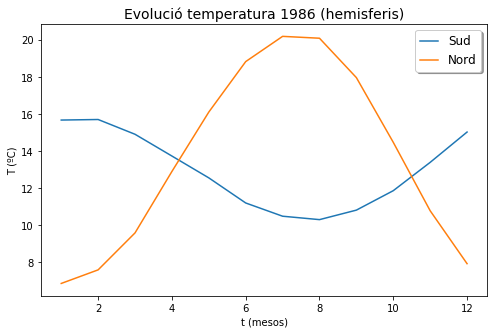

In [12]:
t_n=t[86,:,l1s:l90s,:]#Definir la zona i l'any que volem.
t_n_a=np.mean(t_n,axis=2)-273.15#Càlcul de la mitjana de totes les latituds.
t_n_a_a=np.empty(12)
t_n_a_a.fill(np.nan)
coslats=np.cos(np.radians(lats))
sumas=np.sum(coslats)
for it in range(12):
    t_n_a_a[it]=np.sum(coslats[:]*t_n_a[it,:])/sumas
#Representar les dades:

fig,ax1=plt.subplots(figsize=(8,5))
plt.plot(months,t_n_a_a)
plt.plot(months,t_m_a_a)
plt.title('Evolució temperatura 1986 (hemisferis)',fontsize=14)
plt.xlabel('t (mesos)')
plt.ylabel('T (ºC)')
plt.legend(('Sud', 'Nord'),
           shadow=True, handlelength=1.5, fontsize=12)
fig.savefig(data_path+'fig_iii', bbox_inches='tight',dpi=400)

Il·lustració 2.4: Evolució de les temperatures durant  l'any 1986 en els dos hemisferis.

En la següent part es parlarà d'un aspecte treballat anteriorment en la part teòrica. Es calcularan les anomalies en la temperatura en el llarg dels anys que comprèn aquest arxiu de dades. Es farà considerant que la temperatura total és igual a la suma de la temperatura climàtica amb la temperatura de les anomalies. Per tant, per trobar la temperatura de les anomalies haurem de restar la temperatura del clima a la temperatura total.

Per fer-ho, primer de tot es calcula la temperatura del clima fent la mitjana de les temperatures de cada any en tots els mesos, latituds i longituds.

In [7]:
t_anom=np.zeros((111,12,ny,ni))#Construcció d'una matriu amb les mateixes dimensions de t. La matriu només conté zeros.
t_anom.fill(np.nan)#Omplir l'array de "NaNs".
clim=np.nanmean(t,axis=0)#Fa la mitjana de temperatura de tots els anys tenint en compte tots els mesos, longituds i latituds.
for iyr in range(nyr):#En aquest bucle apliquem la formula explicada anteriorment. El bucle es repetirà tantes vegades com el nombre d'anys (111).
       for imon in range(12):#En cada bucle es repetirà 12 vegades la fómula explicada.
        t_anom[iyr,imon,:,:]=t[iyr,imon,:,:]-clim[imon,:,:]#Execució de la fórmula

Tot seguit es visualitzaran totes les anomalies que es donen en un mes donat de l'any (gener, en aquest cas). Per fer-ho primer es calcula la mitjana de totes les latituds i longituds de la temperatura de les anomalies. Es visualitzaran totes les anomalies que s'han produit en els mesos de gener des del 1900 al 2010.

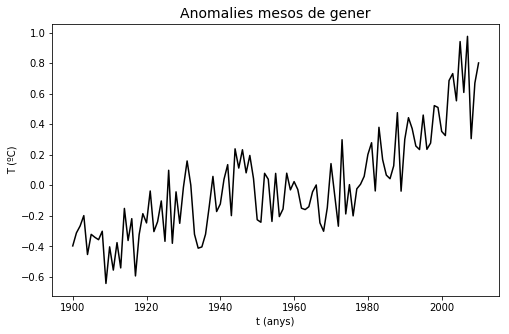

In [8]:
t_anom_a=np.nanmean(t_anom,axis=3)#mitjana de les longituds.
t_anom_a_a=np.empty((111,12,))
t_anom_a_a.fill(np.nan)
for it in range(111):
     for imon in range(12):
        t_anom_a_a[it,imon]=np.sum(coslat[:]*t_anom_a[it,imon,:])/suma

years=np.arange(111)+1900
fig,ax1=plt.subplots(figsize=(8,5))

plt.plot(years, t_anom_a_a[:,0], color='k')
plt.title('Anomalies mesos de gener',fontsize=14)
plt.xlabel('t (anys)')
plt.ylabel('T (ºC)')
fig.savefig(data_path+'fig_iv', bbox_inches='tight',dpi=400)

Il·lustració 2.5: Anomalies en el seguit de mesos de gener (1900-2010).

També es poden veure les anomalies en el seguit d'anys.

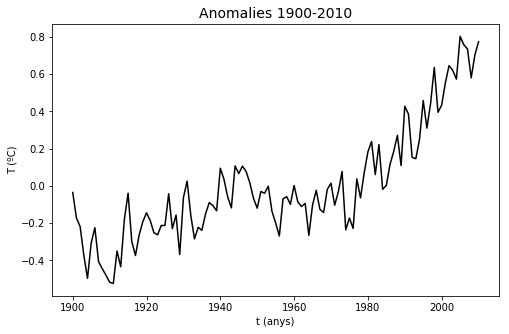

In [35]:
t_anom_a_b=np.nanmean(t_anom_a_a, axis=1)
fig,ax1=plt.subplots(figsize=(8,5))
plt.plot(years,t_anom_a_b, color='k')
plt.title('Anomalies 1900-2010',fontsize=14)
plt.xlabel('t (anys)')
plt.ylabel('T (ºC)')

fig.savefig(data_path+'fig_19', bbox_inches='tight',dpi=400)

Il·lustració 2.6: Comparació de les anomalies del gener amb les del desembre.

De fet, el mes de desembre és un mes que especialment interessant, en alguns certs anys es produeix el fenòmen de "El Niño". Aquest fenomen que s'ha explicat anteriorment al treball, es produeix a l'oceà pacífic. En concret, es produeix a la costa nord-oest de Sud Amèrica. 

### Mapes

In [38]:
t_anom_b=t_anom[110,:,:,:]
t_anom_b_a=np.nanmean(t_anom_b,axis=0)
var=t_anom_b_a

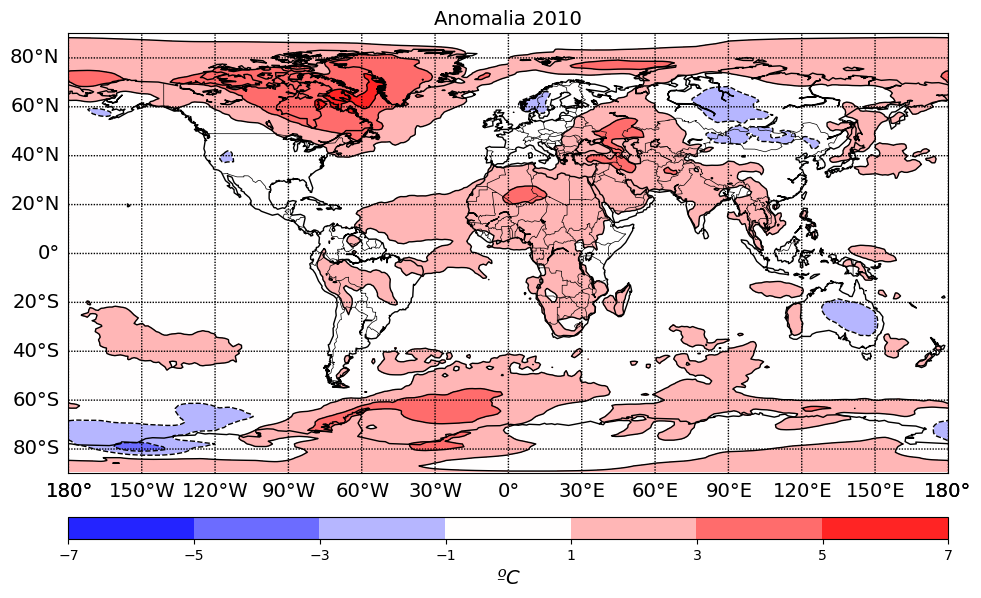

In [48]:

dpi = 101

fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax = fig.add_axes([0.1,0.1,0.8,0.9])

#----Creació del mapa
map = Basemap(projection='cyl',llcrnrlat= -90.,urcrnrlat= 90.,\
resolution='c', llcrnrlon=-180.,urcrnrlon=180.,lon_0=0.,
lat_0=0.,)

#----Dibuixar les costes, estats, països...
map.drawcoastlines()
#map.drawstates()
#map.fillcontinents()
map.drawcountries(zorder=100)

#----Dibuixar paral·lels i meridians
map.drawparallels(np.arange( -80., 90.,20.),labels=[1,0,0,0],fontsize=14)
map.drawmeridians(np.arange(-180,180.,30.),labels=[0,0,0,1],fontsize=14)

#----*DEFINIR LES COORDENADES X I Y DEL MAPA COM A LES LONGITUDS I LES LATITUDS DE L'ARXIU DE DADES.
x, y = map(*np.meshgrid(lon,lat))
x1, y1 = map(*np.meshgrid(lon-359,lat))
#-- contour levels
#clevs = np.arange(-2,2,.2)*1e7
#clevs=np.arange(13)*2-12
clevs=np.arange(8)*2-7

#----**PINTAR ELS MAPES
cnplot = map.contourf(x1,y1,var,cmap=plt.cm.bwr,levels=clevs)
cnplot = map.contourf(x,y,var,cmap=plt.cm.bwr,levels=clevs)
cs2 = map.contour(x1, y1, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
cs2 = map.contour(x, y, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
#cs2 = map.contour(x, y, var, colors = 'k', linewidths = 1,levels=clevs)
#plt.clabel(cs2, fmt = '%d', colors = 'C',fontsize=12)
#cnplot = map.contourf(x,y,var,cmap=plt.cm.coolwarm)

#----Creació d'una barra de colors
cbar = map.colorbar(cnplot,location='bottom',pad="10%") #-- pad: distància entre el mapa i la barra de colors
cbar.set_label('$ºC$',fontsize=14) #-- Títol de la barra de colors


#----Títol
#plt.title('2000-2010 minus 1900-1910',fontsize=14)
plt.title('Anomalia 2010',fontsize=14)
plt.plot(years, t_anom_a_a[:,0], color='k')
fig.savefig(data_path+'fig_20', bbox_inches='tight',dpi=400)

In [40]:
np.amax(var)

6.624153137207031

In [49]:
np.amin(var)

-4.01034418741862

Com que amb un gràfic d'anomalies és difícil detectar aquest fenòmen (és molt aïllat, ja que només es produeix en una localització concreta), es visualitzaran les dades d'una manera diferent. En aquest cas farem servir un mapa. Per fer servir el mapa es necessitaran biblioteques Python diferents, instalades al principi de l'exercici.

Per dur a terme el següent exercici s'ha escollit el fenòmen de "El Niño" que es va produir a finals de l'any 1997. Per veure-ho en el mapa es demanarà que la variable que es vol fer servir (var) sigui la temperatura de les anomalies del desembre de 1997. Anteriorment ja s'ha definit el que vol dir temperatura de les anomalies i per tant, només falta concretar la data.

https://es.wikipedia.org/wiki/Anexo:Eventos_de_El_Ni%C3%B1o_y_La_Ni%C3%B1a_en_el_siglo_XX

In [50]:
t_nino=t_anom[97,11,:,:]
var=t_nino

En el següent bloc de codi s'ajusten alguns paràmetres relacionats amb el disseny del mapa. Com que el disseny del mapa no afecta en el fil conductor del treball, no s'especificarà més. 
Els paràmetres importants són els marcats amb asteriscos. El primer de tots * defineix les latituds i les longituds com a les cordenades x i y del mapa. L'altre ** s'encarrega de reproduir les dades de la variable "var" en el mapa.

Com es port veure en el mapa resultant. La zona de la costa nord-oest de Sud-Amèrica pateix un escalfament d'entre tres i cinc graus degut al fenòmen de "El Niño". Cal dir també que les temperatures estan mesurades des d'una altura dos metres superior al nivell del mar. Si es mesurés la temperatura de la superfície, l'anomalia seria molt més notable.

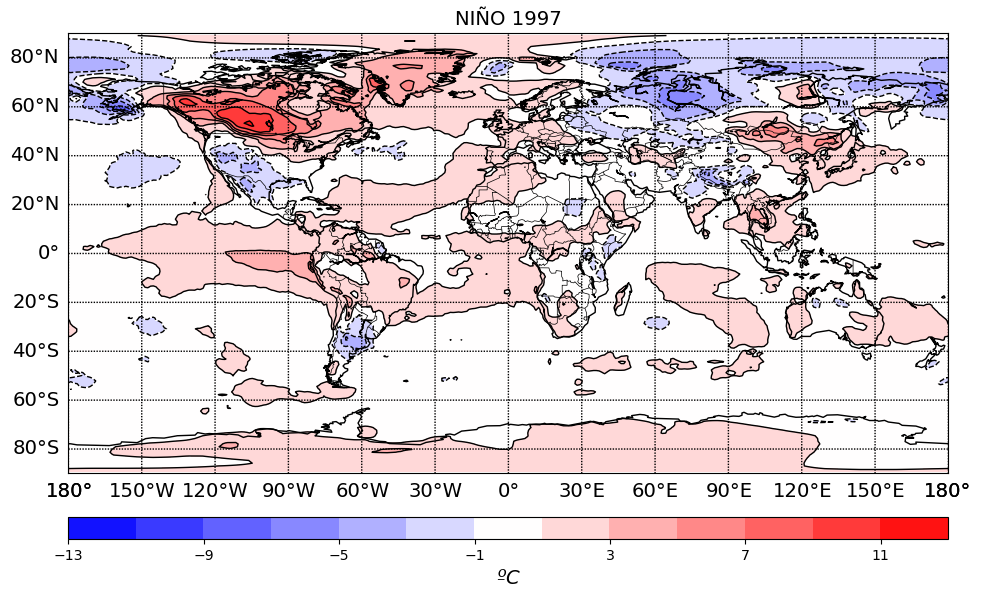

In [51]:
dpi = 101
fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax = fig.add_axes([0.1,0.1,0.8,0.9])

#----Creació del mapa
map = Basemap(projection='cyl',llcrnrlat= -90.,urcrnrlat= 90.,\
resolution='c', llcrnrlon=-180.,urcrnrlon=180.,lon_0=0.,
lat_0=0.,)

#----Dibuixar les costes, estats, països...
map.drawcoastlines()
#map.drawstates()
#map.fillcontinents()
map.drawcountries(zorder=100)

#----Dibuixar paral·lels i meridians
map.drawparallels(np.arange( -80., 90.,20.),labels=[1,0,0,0],fontsize=14)
map.drawmeridians(np.arange(-180,180.,30.),labels=[0,0,0,1],fontsize=14)

#----*DEFINIR LES COORDENADES X I Y DEL MAPA COM A LES LONGITUDS I LES LATITUDS DE L'ARXIU DE DADES.
x, y = map(*np.meshgrid(lon,lat))
x1, y1 = map(*np.meshgrid(lon-359,lat))
#-- contour levels
#clevs = np.arange(-2,2,.2)*1e7
#clevs=np.arange(13)*2-12
clevs=np.arange(14)*2-13

#----**PINTAR ELS MAPES
cnplot = map.contourf(x1,y1,var,cmap=plt.cm.bwr,levels=clevs)
cnplot = map.contourf(x,y,var,cmap=plt.cm.bwr,levels=clevs)
cs2 = map.contour(x1, y1, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
cs2 = map.contour(x, y, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
#cs2 = map.contour(x, y, var, colors = 'k', linewidths = 1,levels=clevs)
#plt.clabel(cs2, fmt = '%d', colors = 'C',fontsize=12)
#cnplot = map.contourf(x,y,var,cmap=plt.cm.coolwarm)

#----Creació d'una barra de colors
cbar = map.colorbar(cnplot,location='bottom',pad="10%") #-- pad: distància entre el mapa i la barra de colors
cbar.set_label('$ºC$',fontsize=14) #-- Títol de la barra de colors


#----Títol
#plt.title('2000-2010 minus 1900-1910',fontsize=14)
plt.title('NIÑO 1997',fontsize=14)
fig.savefig(data_path+'fig_21', bbox_inches='tight',dpi=400)

In [52]:
np.amax(var)

11.573455810546875

In [22]:

np.shape(dif)

(160, 320)

Il·lustració 2.7: Mapa d'anomalies del desembre del 1997.

Ara és crearà un altre mapa amb una finalitat diferent. S'ensenyarà la diferència de temperatura entre els primers i els últims deu anys que conté l'arxiu de dades. S'ha escollit el mes de d'agost per dur a terme l'exercici. Per fer-ho, primer es calcularan les mitjanes de les latituds de la mateixa manera que en els apartats anteriors. Per saber la diferència restarem els dos resultats: t(2000/2010)-t(1900-1910). 

3.775390625 47.28515625 38.158203125 7.69140625 2.3828125 0.70703125


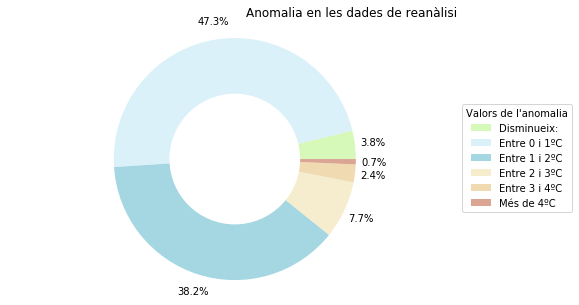

100.0


In [6]:
t_j_i=t[0:10,:,:,:]
t_j_i=np.mean(t_j_i,axis=1)
t_j_i=np.mean(t_j_i,axis=0)

t_j_f=t[102:112,:,:,:]
t_j_f=np.mean(t_j_f,axis=1)
t_j_f=np.mean(t_j_f,axis=0)

dif= t_j_f - t_j_i
aug0=0
aug1=0
aug2=0
aug3=0
aug4=0
aug5=0
dis=0
for ilat in range(160):
    for ilon in range(320):
        if dif[ilat,ilon]<0:
            dis=dis+1
            
        if 1>dif[ilat,ilon]>0:
            aug0=aug0+1
            
        if 2>dif[ilat,ilon]>=1:
            aug1=aug1+1
            
        if 3>dif[ilat,ilon]>=2:
            aug2=aug2+1
            
        if 4>dif[ilat,ilon]>=3:
            aug3=aug3+1
            
        if dif[ilat,ilon]>=4:
            aug4=aug4+1

            

dis=dis*100/51200                
aug0=aug0*100/51200
aug1=aug1*100/51200
aug2=aug2*100/51200
aug3=aug3*100/51200
aug4=aug4*100/51200

print(dis,aug0,aug1,aug2,aug3, aug4,)
total=dis+aug0+aug1+aug2+aug3+aug4
labels = 'Disminueix:', 'Entre 0 i 1ºC','Entre 1 i 2ºC', 'Entre 2 i 3ºC','Entre 3 i 4ºC', 'Més de 4ºC'
sizes = [dis, aug0, aug1, aug2, aug3, aug4,]

colors = ['#d6f8b8','#daf1f9','#a4d7e1','#f6edcf','#f0dab1','#daa592',]
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.pie(sizes, explode=None, labels=None, autopct='%1.1f%%',
        shadow=None, startangle=0, pctdistance=1.15, radius=5,colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels,
          title="Valors de l'anomalia",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#draw circle
centre_circle = plt.Circle((0,0),2.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Anomalia en les dades de reanàlisi",
         loc='right')


plt.show()
fig.savefig(data_path+'fig_23', bbox_inches='tight',dpi=400)
print (total)

2.30078125 42.1171875 44.09375 10.40625 0.90625 0.17578125
5.25 52.453125 32.22265625 4.9765625 3.859375 1.23828125


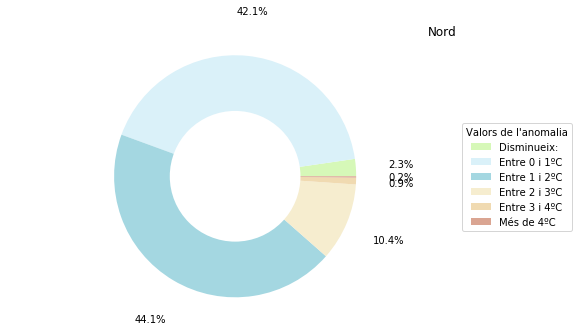

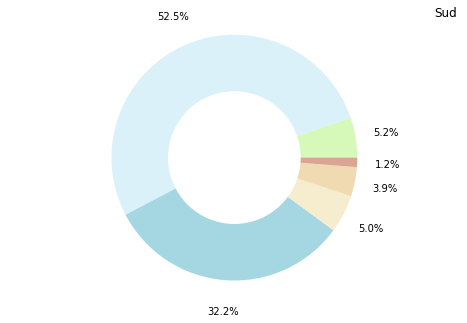

In [7]:
aug0n=0
aug1n=0
aug2n=0
aug3n=0
aug4n=0
disn=0
for ilat in range(80):
    for ilon in range(320):
        if dif[ilat,ilon]<0:
            disn=disn+1
            
        if 1>dif[ilat,ilon]>0:
            aug0n=aug0n+1
            
        if 2>dif[ilat,ilon]>=1:
            aug1n=aug1n+1
            
        if 3>dif[ilat,ilon]>=2:
            aug2n=aug2n+1
            
        if 4>dif[ilat,ilon]>=3:
            aug3n=aug3n+1
            
        if dif[ilat,ilon]>=4:
            aug4n=aug4n+1

            

disn=disn*100/25600                
aug0n=aug0n*100/25600
aug1n=aug1n*100/25600
aug2n=aug2n*100/25600
aug3n=aug3n*100/25600
aug4n=aug4n*100/25600

print(disn,aug0n,aug1n,aug2n,aug3n, aug4n,)
total=disn+aug0n+aug1n+aug2n+aug3n+aug4n
labels = 'Disminueix:', 'Entre 0 i 1ºC','Entre 1 i 2ºC', 'Entre 2 i 3ºC','Entre 3 i 4ºC', 'Més de 4ºC'
sizes = [disn, aug0n, aug1n, aug2n, aug3n, aug4n,]


fig1, ax1 = plt.subplots(figsize=(8,5))
plt.pie(sizes, explode=None, labels=None, autopct='%1.1f%%',
        shadow=None, startangle=0, pctdistance=1.37, radius=5,colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels,
          title="Valors de l'anomalia",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#draw circle
centre_circle = plt.Circle((0,0),2.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Nord",
         loc='right')
fig.savefig(data_path+'fig_24b', bbox_inches='tight',dpi=400)

aug0s=0
aug1s=0
aug2s=0
aug3s=0
aug4s=0
diss=0
for ilat in range(80):
    for ilon in range(320):
        if dif[ilat+80,ilon]<0:
            diss=diss+1
            
        if 1>dif[ilat+80,ilon]>0:
            aug0s=aug0s+1
            
        if 2>dif[ilat+80,ilon]>=1:
            aug1s=aug1s+1
            
        if 3>dif[ilat+80,ilon]>=2:
            aug2s=aug2s+1
            
        if 4>dif[ilat+80,ilon]>=3:
            aug3s=aug3s+1
            
        if dif[ilat+80,ilon]>=4:
            aug4s=aug4s+1

            

diss=diss*100/25600                
aug0s=aug0s*100/25600
aug1s=aug1s*100/25600
aug2s=aug2s*100/25600
aug3s=aug3s*100/25600
aug4s=aug4s*100/25600

print(diss,aug0s,aug1s,aug2s,aug3s, aug4s,)
total=diss+aug0s+aug1s+aug2s+aug3s+aug4s
labels = 'Disminueix:', 'Entre 0 i 1ºC','Entre 1 i 2ºC', 'Entre 2 i 3ºC','Entre 3 i 4ºC', 'Més de 4ºC'
sizes = [diss, aug0s, aug1s, aug2s, aug3s, aug4s,]


fig1, ax1 = plt.subplots(figsize=(8,5))
plt.pie(sizes, explode=None, labels=None, autopct='%1.1f%%',
        shadow=None, startangle=0, pctdistance=1.25, radius=5,colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



#draw circle
centre_circle = plt.Circle((0,0),2.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Sud",
         loc='right')

plt.show()
fig.savefig(data_path+'fig_24a', bbox_inches='tight',dpi=400)

Ara es representarà en un mapa tal com s'ha fet abans.

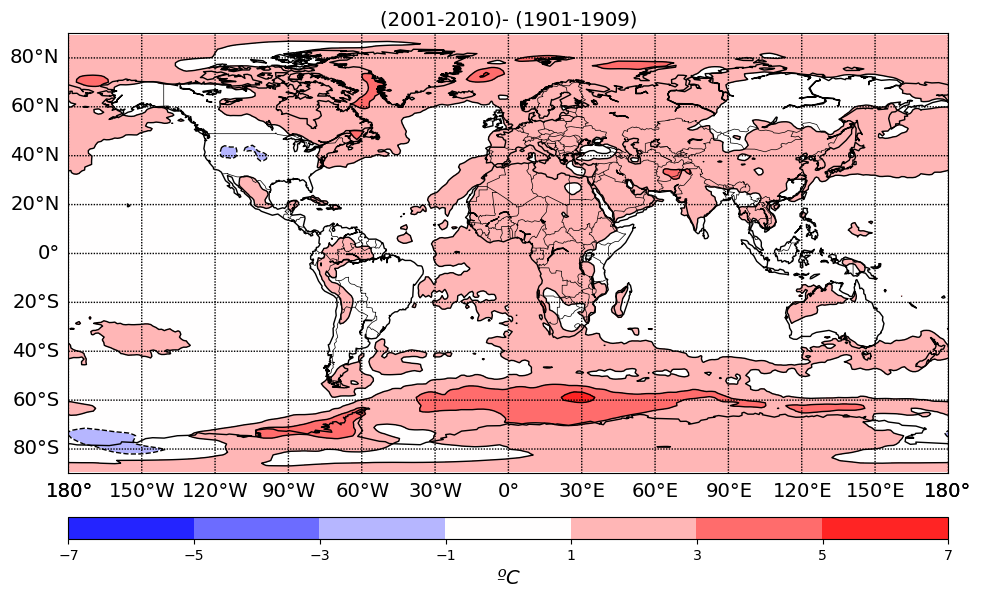

In [9]:
#----Definim la variable que volem representar.
var=dif

dpi = 101
fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax = fig.add_axes([0.1,0.1,0.8,0.9])

#----Creació del mapa
map = Basemap(projection='cyl',llcrnrlat= -90.,urcrnrlat= 90.,\
resolution='c', llcrnrlon=-180.,urcrnrlon=180.,lon_0=0.,
lat_0=0.,)

#----Dibuixar les costes, estats, països...
map.drawcoastlines()
#map.drawstates()
#map.fillcontinents()
map.drawcountries(zorder=100)

#----Dibuixar paral·lels i meridians
map.drawparallels(np.arange( -80., 90.,20.),labels=[1,0,0,0],fontsize=14)
map.drawmeridians(np.arange(-180,180.,30.),labels=[0,0,0,1],fontsize=14)

#----DEFINIR LES COORDENADES X I Y DEL MAPA COM A LES LONGITUDS I LES LATITUDS DE L'ARXIU DE DADES.
x, y = map(*np.meshgrid(lon,lat))
x1, y1 = map(*np.meshgrid(lon-359,lat))
#-- contour levels
#clevs = np.arange(-15,15,.2)*2
#clevs=np.arange(13)*2-12
clevs=np.arange(8)*2-7


#----PINTAR ELS MAPES
cnplot = map.contourf(x1,y1,var,cmap=plt.cm.bwr,levels=clevs)
cnplot = map.contourf(x,y,var,cmap=plt.cm.bwr,levels=clevs)
cs2 = map.contour(x1, y1, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
cs2 = map.contour(x, y, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
#cs2 = map.contour(x, y, var, colors = 'k', linewidths = 1,levels=clevs)
#plt.clabel(cs2, fmt = '%d', colors = 'C',fontsize=12)
#cnplot = map.contourf(x,y,var,cmap=plt.cm.coolwarm)

#----Creació d'una barra de colors
cbar = map.colorbar(cnplot,location='bottom',pad="10%") #-- pad: distància entre el mapa i la barra de colors
cbar.set_label('$ºC$',fontsize=14) #-- Títol de la barra de colors


#----Títol
plt.title('(2001-2010)- (1901-1909)',fontsize=14)
fig.savefig(data_path+'fig_22', bbox_inches='tight',dpi=400)


Il·lustració 2.8: Mapa que mostra la diferència de temperatura entre els primers anys (1900-1910) i els últims deu (2000-2010).

Tal com es pot observar, quan es mostra la diferència de temperatura entre els primers i els últims anys, les franges blaves gairebé desapareixen del mapa. En l'actualitat, aquest fet s'atribueix a l'escalfament global que es produeix gràcies a les activitats humanes. 
Per acabar, es demanarà a l'ordinador que mostri el valor més alt resultant de la diferència de temperatura.

In [11]:
print('Diferència màxima:',np.max(var),'ºC')

Diferència màxima: 5.6873474 ºC


Això vol dir que hi ha zones on, durant els últims 100 anys, la temperatura mitjana ha pujat més de 5ºC.

In [23]:
difn=dif[l90n:l1n,:]
difn=np.nanmean(difn, axis=1)
coslatn=np.cos(np.radians(latn))
suman=np.sum(coslatn)
difn=np.sum(coslatn[:]*difn[:])/suman
print('Diferència hemisfèri Nord:',difn,'ºC')


Diferència hemisfèri Nord: 1.0698409 ºC


In [24]:
difs=dif[l1s:l90s,:]
difs=np.nanmean(difs, axis=1)
coslats=np.cos(np.radians(lats))
sumas=np.sum(coslats)
difs=np.sum(coslats[:]*difs[:])/sumas
print('Diferència hemisfèri Sud:',difs,'ºC')

Diferència hemisfèri Sud: 0.943146 ºC
